![ieseg logo](./img/ieseg.png)

#### MBD 2020-2021
# Statistical & Machine Learning Approaches for Marketing

## Homework for Session 6

## Chapter 10 Exercise 3 - Conceptual question - Page 410

In this problem, you will perform K-means clustering manually, with K=2, on a small example with n = 6 observations and p = 2 features. The observations are as follows:

Obs. # X1 # X2

1    ###  1 ###  4

2    ###  1 ###  3

3    ###  0 ###  4

4    ###  5 ###  1

5    ###  6 ###  2

6    ###  4 ###  0

(a) Plot the observations.

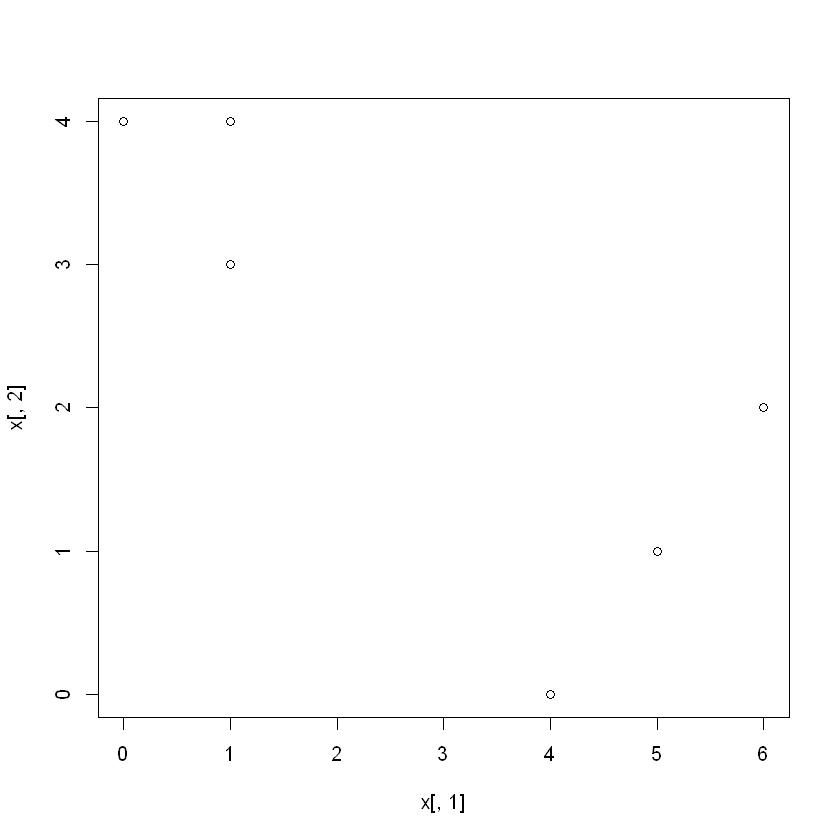

In [1]:
x <- cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
plot(x[,1], x[,2])

(b) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation.

In [2]:
set.seed(1)
labels <- sample(2, nrow(x), replace = T)
labels

[1] 1 2 1 1 2 1

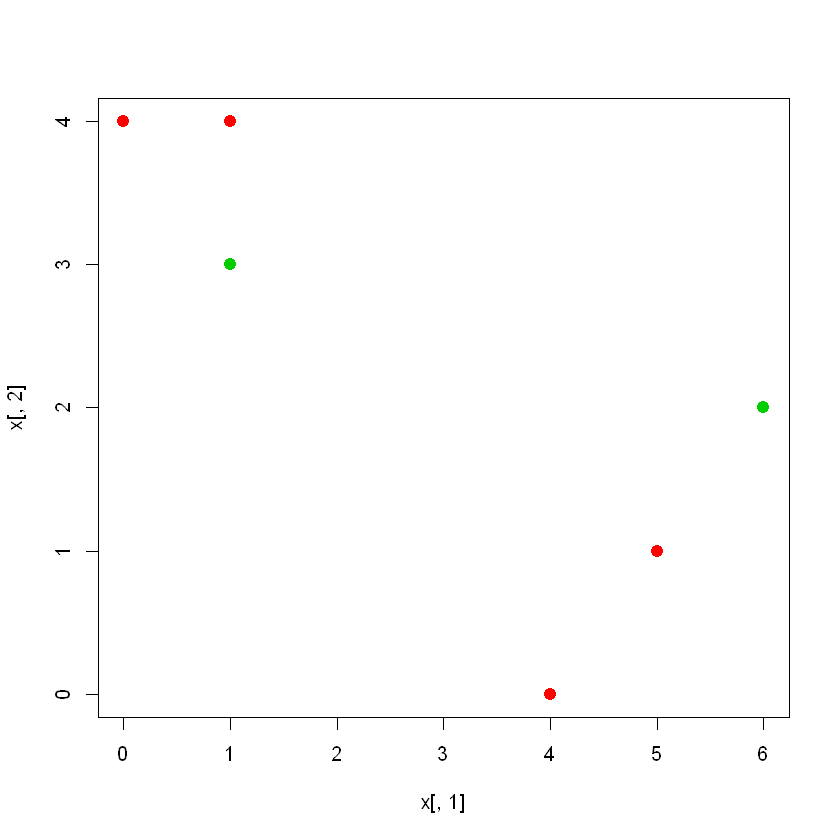

In [3]:
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)

(c) Compute the centroid for each cluster.

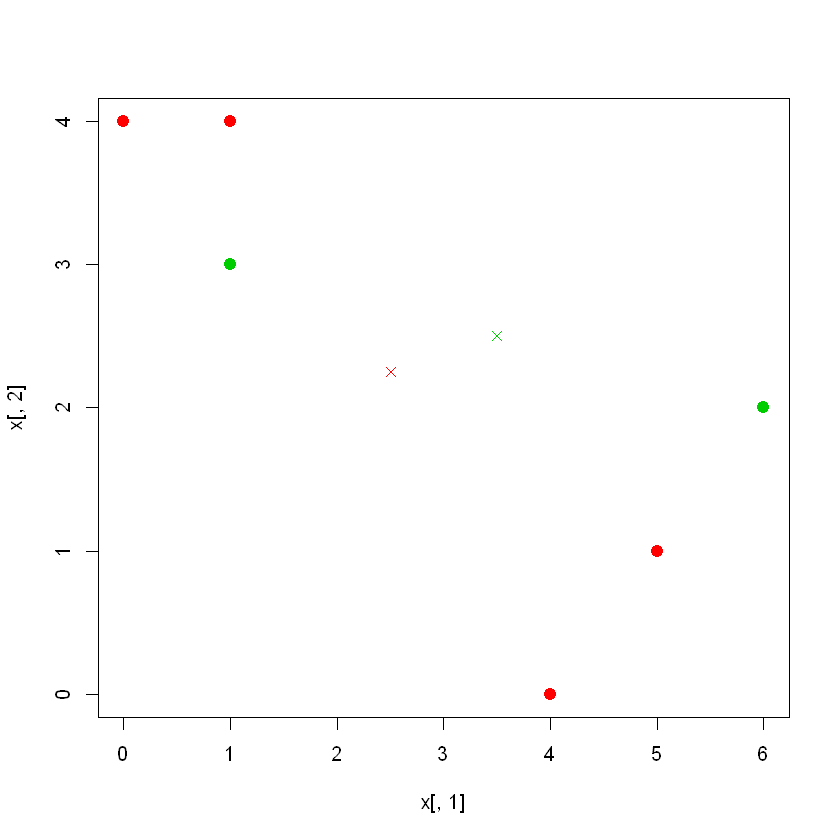

In [4]:
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

(d) Assign each observation to the centroid to which it is closest, interms of Euclidean distance. Report the cluster labels for each observation.

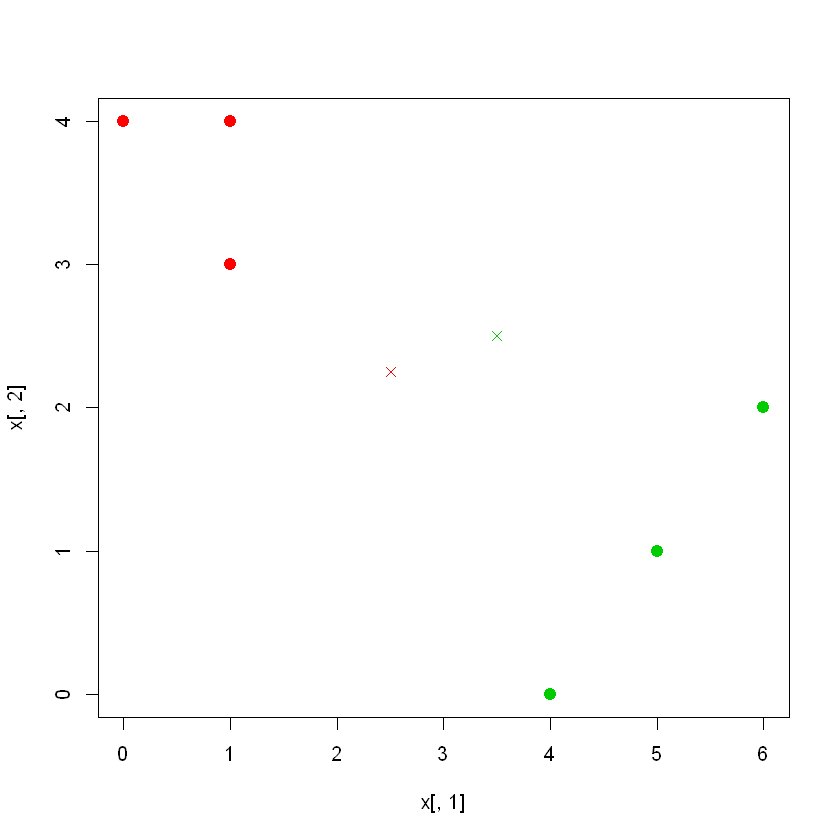

In [5]:
labels <- c(1, 1, 1, 2, 2, 2)
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

(e) Repeat (c) and (d) until the answers obtained stop changing.

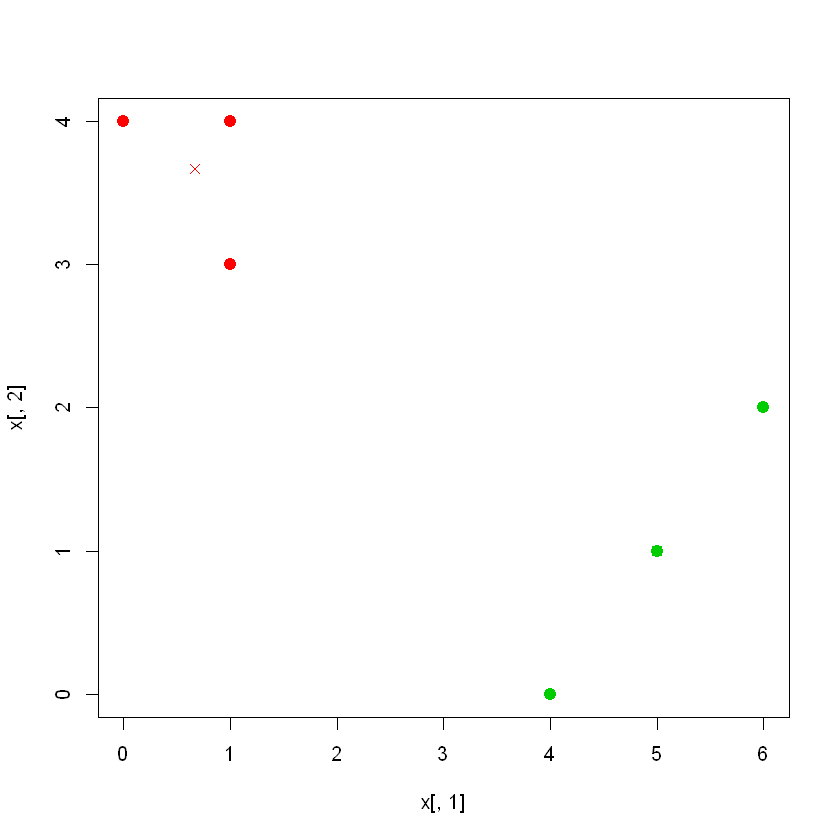

In [6]:
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

(f) In your plot from (a), color the observations according to the cluster labels obtained.

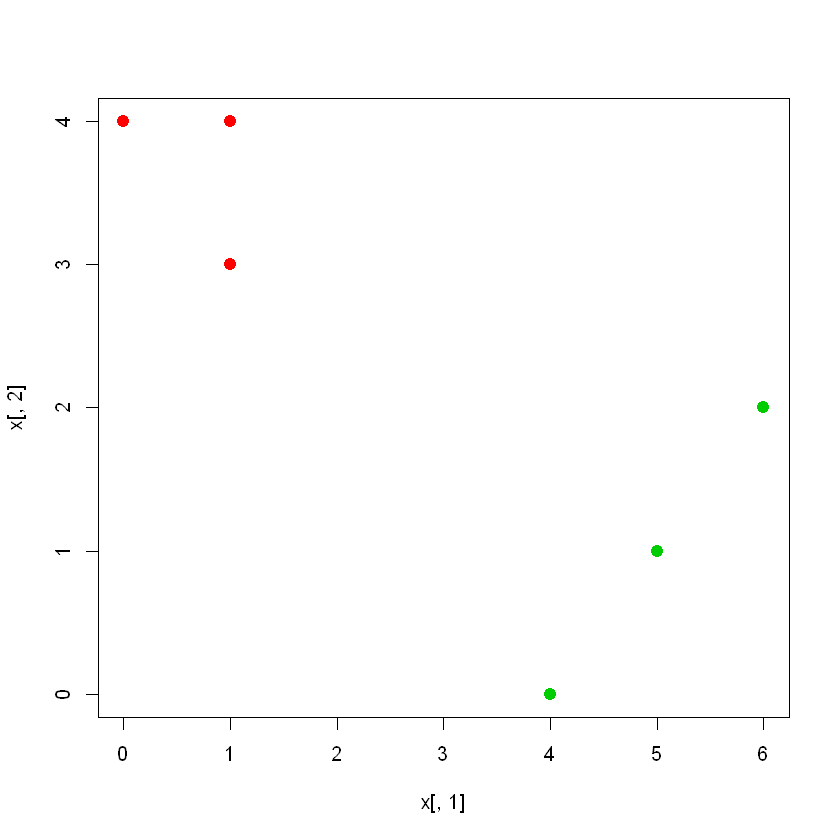

In [7]:
plot(x[, 1], x[, 2], col=(labels + 1), pch = 20, cex = 2)

## Chapter 10 Exercise 8 - Conceptual question - Page 416

In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev output of the prcomp() function. On the USArrests data, calculate PVE in two ways:

(a) Using the sdev output of the prcomp() function, as was done in Section 10.2.3.

In [8]:
pr.out <- prcomp(USArrests, scale = TRUE)
pr.var <- pr.out$sdev^2
pve <- pr.var / sum(pr.var)
sum(pr.var)

[1] 4

In [9]:
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

(b) By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE. These two approaches should give the same results. Hint: You will only obtain the same results in (a) and (b) if the same data is used in both cases. For instance, if in (a) you performed prcomp() using centered and scaled variables, then you must center and scale the variables before applying Equation 10.3 in (b).

In [10]:
loadings <- pr.out$rotation
USArrests2 <- scale(USArrests)
sumvar <- sum(apply(as.matrix(USArrests2)^2, 2, sum))
apply((as.matrix(USArrests2) %*% loadings)^2, 2, sum) / sumvar

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

## Chapter 10 Exercise 9 - Conceptual question - Page 416

Consider the USArrests data. We will now perform hierarchical clustering on the states.

(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

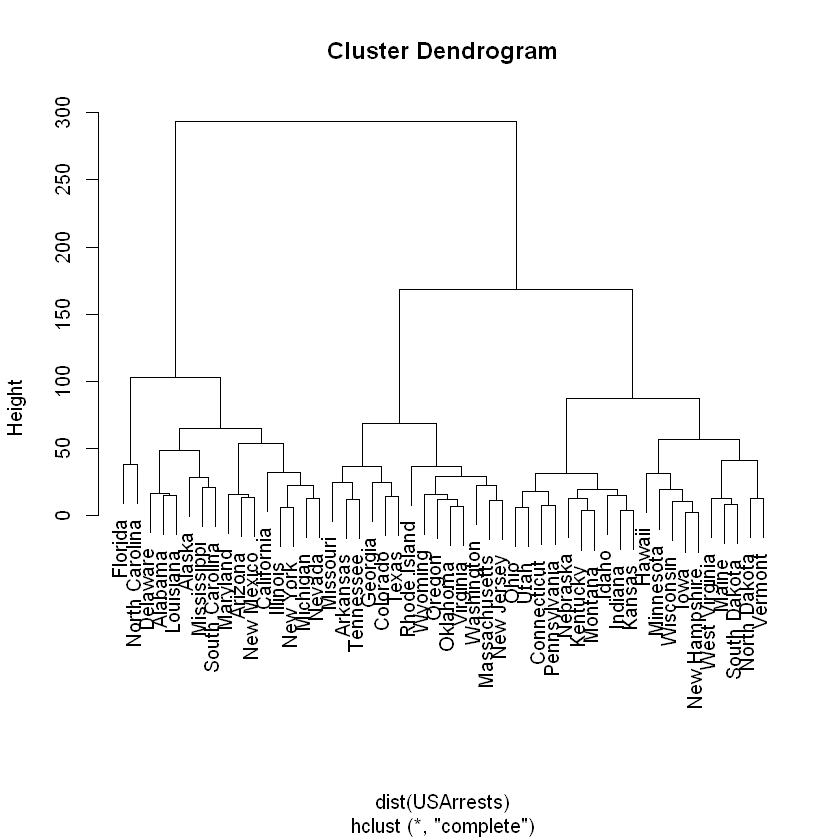

In [11]:
set.seed(2)
hc.complete <- hclust(dist(USArrests), method = "complete")
plot(hc.complete)

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [12]:
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

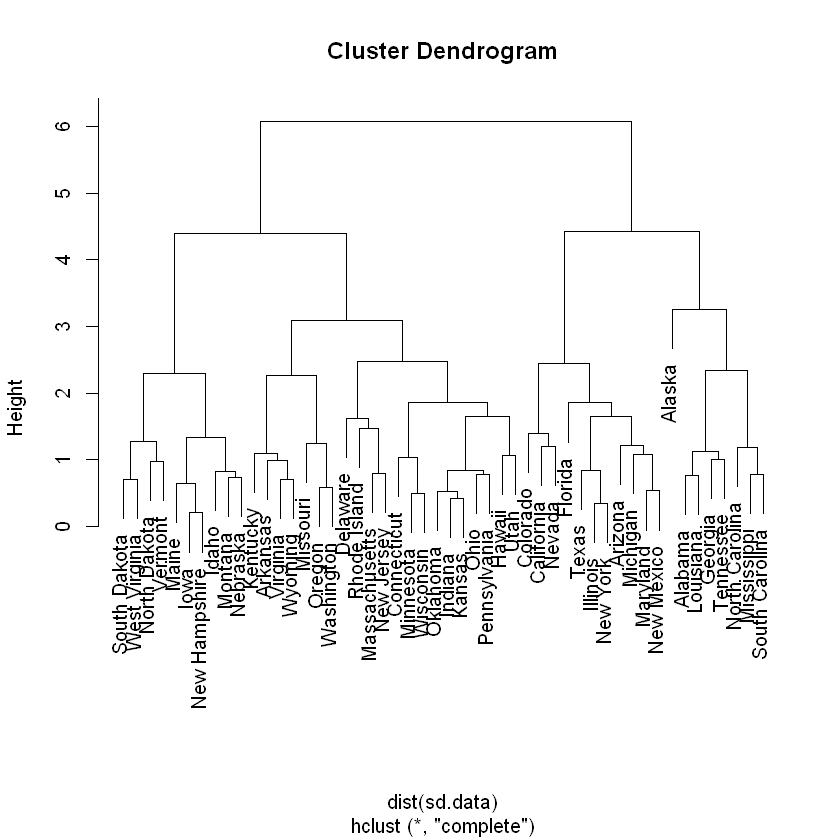

In [13]:
sd.data <- scale(USArrests)
hc.complete.sd <- hclust(dist(sd.data), method = "complete")
plot(hc.complete.sd)

(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [14]:
cutree(hc.complete.sd, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [15]:
table(cutree(hc.complete, 3), cutree(hc.complete.sd, 3))

   
     1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

Scaling the variables affect the clusters obtained although the trees are somewhat similar. The variables should be scaled beforehand because the data measures have different units.

## Chapter 10 Exercise 10 - Conceptual question - Page 417

In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in R that you can use to generate data. One example is the rnorm() function; runif() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [16]:
set.seed(2)
x <- matrix(rnorm(20 * 3 * 50, mean = 0, sd = 0.001), ncol = 50)
x[1:20, 2] <- 1
x[21:40, 1] <- 2
x[21:40, 2] <- 2
x[41:60, 1] <- 1
true.labels <- c(rep(1, 20), rep(2, 20), rep(3, 20))

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

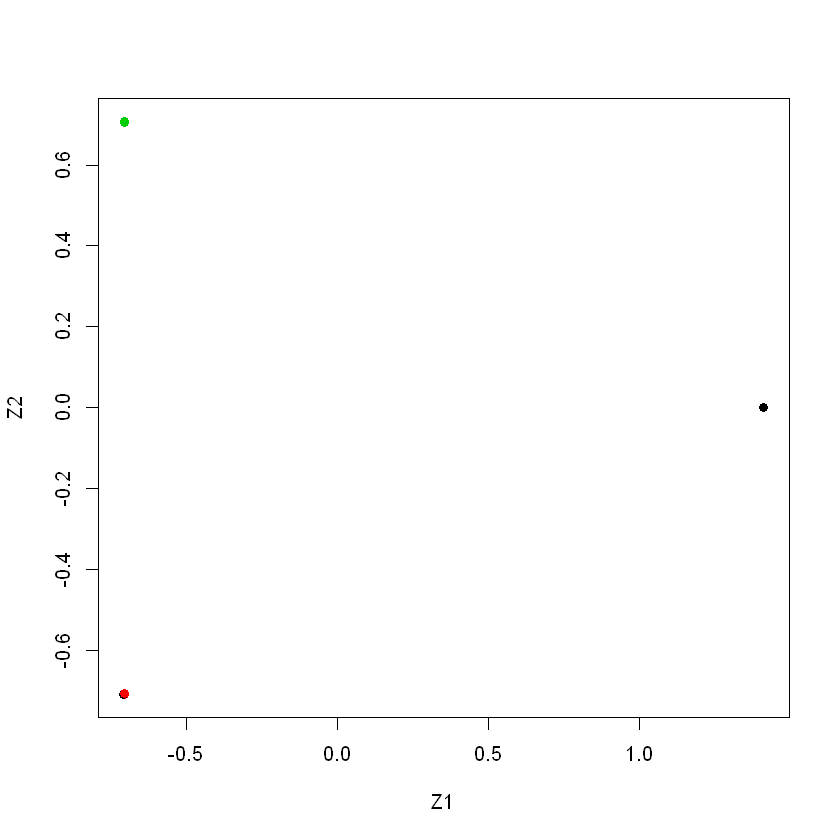

In [17]:
pr.out <- prcomp(x)
plot(pr.out$x[, 1:2], col = 1:3, xlab = "Z1", ylab = "Z2", pch = 19)

(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? Hint: You can use the table() function in R to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [18]:
km.out <- kmeans(x, 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  0  0 20
          2 20  0  0
          3  0 20  0

The observations are perfectly clustered.

(d) Perform K-means clustering with K = 2. Describe your results.

In [19]:
km.out <- kmeans(x, 2, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2
          1 20  0
          2  0 20
          3 20  0

All observations of one of the three clusters is now absorbed in one of the two clusters.

(e) Now perform K-means clustering with K = 4, and describe your results.

In [20]:
km.out <- kmeans(x, 4, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3  4
          1 11  9  0  0
          2  0  0 20  0
          3  0  0  0 20

The first cluster is splitted into two clusters.

(f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60×2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [21]:
km.out <- kmeans(pr.out$x[, 1:2], 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  0  0 20
          2  0 20  0
          3 20  0  0

All observations are perfectly clustered once again.

(g) Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [22]:
km.out <- kmeans(scale(x), 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  9  2  9
          2  2 18  0
          3  7  1 12

We may see that we have worse results than with unscaled data, as scaling affects the distance between the observations.